In [1]:
#points

In [2]:
from volumetricspy.stats import Dot,CloudPoints
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import Voronoi, voronoi_plot_2d

In [3]:
p1 = Dot(x=10,y=20,z=1, fields={'phi':0.15})


In [4]:
p1.df()

,x,y,z,crs,phi,geometry
0,10.0,20.0,1.0,None,0.15,POINT (10.00000 20.00000)


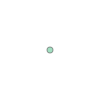

In [5]:
p1.to_shapely()

In [6]:
#df = pd.read_csv('sample_data_biased.csv')     # load our data table
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_biased.csv')
df

,X,Y,Facies,Porosity,Perm
0,100,900,1,0.115359,5.736104
1,100,800,1,0.136425,17.211462
2,100,600,1,0.135810,43.724752
3,100,500,0,0.094414,1.609942
4,100,100,0,0.113049,10.886001
...,...,...,...,...,...
284,190,199,1,0.109411,3.247265
285,190,419,0,0.099541,1.528003
286,920,379,0,0.094099,2.514597
287,60,149,0,0.100167,3.636854


In [7]:
list_points = []

for i,r in df.iterrows():
    d = {
        'x':r['X'],
        'y':r['Y'],
        'fields':{
            'phi':r['Porosity'],
            'perm':r['Perm']
        }
    }
    list_points.append(d)

cp = CloudPoints(points = list_points)

In [8]:
cp.df()

,x,y,z,crs,phi,perm,geometry
0,100.0,900.0,None,None,0.115359,5.736104,POINT (100.000 900.000)
0,100.0,800.0,None,None,0.136425,17.211462,POINT (100.000 800.000)
0,100.0,600.0,None,None,0.135810,43.724752,POINT (100.000 600.000)
0,100.0,500.0,None,None,0.094414,1.609942,POINT (100.000 500.000)
0,100.0,100.0,None,None,0.113049,10.886001,POINT (100.000 100.000)
...,...,...,...,...,...,...,...
0,190.0,199.0,None,None,0.109411,3.247265,POINT (190.000 199.000)
0,190.0,419.0,None,None,0.099541,1.528003,POINT (190.000 419.000)
0,920.0,379.0,None,None,0.094099,2.514597,POINT (920.000 379.000)
0,60.0,149.0,None,None,0.100167,3.636854,POINT (60.000 149.000)


In [18]:
cp = cp.poly_declustering()
cp_df = cp.df()
cp_df

,x,y,z,crs,phi,perm,area,weight,geometry
0,100.0,900.0,None,None,0.115359,5.736104,39264.670640,0.014517,POINT (100.000 900.000)
0,100.0,800.0,None,None,0.136425,17.211462,20266.043520,0.007493,POINT (100.000 800.000)
0,100.0,600.0,None,None,0.135810,43.724752,15024.287162,0.005555,POINT (100.000 600.000)
0,100.0,500.0,None,None,0.094414,1.609942,8168.938225,0.003020,POINT (100.000 500.000)
0,100.0,100.0,None,None,0.113049,10.886001,21929.368425,0.008108,POINT (100.000 100.000)
...,...,...,...,...,...,...,...,...,...
0,190.0,199.0,None,None,0.109411,3.247265,49.950000,0.000018,POINT (190.000 199.000)
0,190.0,419.0,None,None,0.099541,1.528003,56.250000,0.000021,POINT (190.000 419.000)
0,920.0,379.0,None,None,0.094099,2.514597,330.580357,0.000122,POINT (920.000 379.000)
0,60.0,149.0,None,None,0.100167,3.636854,409.500000,0.000151,POINT (60.000 149.000)


In [22]:
cp_df['weight'].sum()

0.9999999999999999

In [23]:
np.dot(cp_df['phi'],cp_df['weight'])

0.13709834120031564

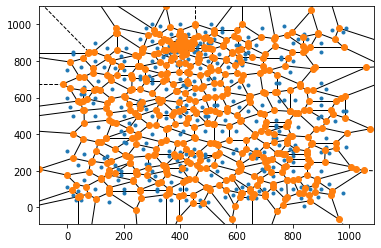

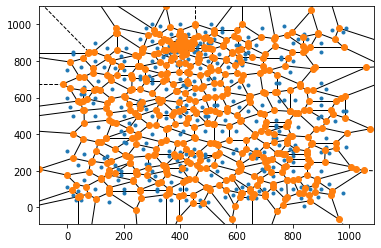

In [10]:
vr = Voronoi(df[['X','Y']].values)
voronoi_plot_2d(vr)

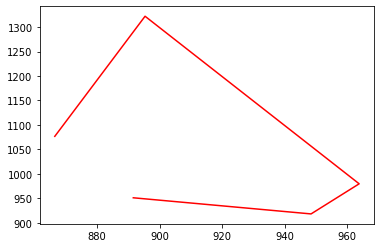

In [11]:
plt.plot(vr.vertices[vr.regions[2],0],vr.vertices[vr.regions[2],1],'r')

In [12]:
a1 = np.ones(5)
a2 = np.zeros(5)

np.column_stack((a1,a2))

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [13]:
vertices = vr.vertices
regions = vr.regions

sev = vertices[regions[7],:]
sev

array([[ 395.        ,  909.        ],
       [1415.        ,  754.        ],
       [ 963.88888889,  979.55555556],
       [ 895.37037037, 1322.14814815]])

In [14]:
sev = np.vstack((sev,sev[0,:]))

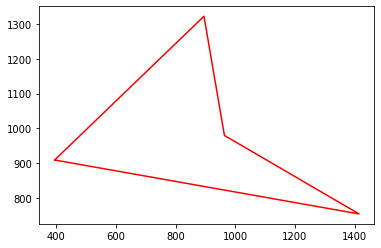

In [15]:
plt.plot(sev[:,0],sev[:,1],'r')